In [ ]:
#Convert object column to numerical type
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df = df.set_index('CustomerID')
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
label_Encoder = preprocessing.LabelEncoder()
df['Genre']= label_Encoder.fit_transform(df['Genre']) # 1 for Male 0 for Female
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Gener
CustomerID,,,,,
1,1,19,15,39,1
2,1,21,15,81,1
3,0,20,16,6,0
4,0,23,16,77,0
5,0,31,17,40,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:,:4]
Y = df.index

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(X,Y, train_size=.75, random_state=123)
y_train.shape

(150,)

In [ ]:
# KMeans Clustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cluster = []
for k in range(1,11):
  kmeans=KMeans(n_clusters=k).fit(df)
  cluster.append(kmeans.inertia_)


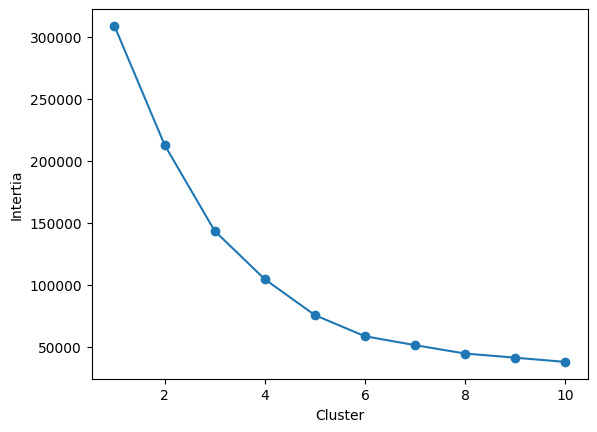

In [ ]:
plt.plot(range(1,11), cluster, marker="o")
plt.xlabel('Cluster')
plt.ylabel('Intertia')
plt.show()

In [ ]:
km = KMeans(n_clusters=5).fit(df)
df["Labels"] = km.labels_
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Gener,Labels
CustomerID,,,,,,
1,1,19,15,39,1,2
2,1,21,15,81,1,4
3,0,20,16,6,0,2
4,0,23,16,77,0,4
5,0,31,17,40,0,2


In [ ]:
center = np.array(km.cluster_centers_)

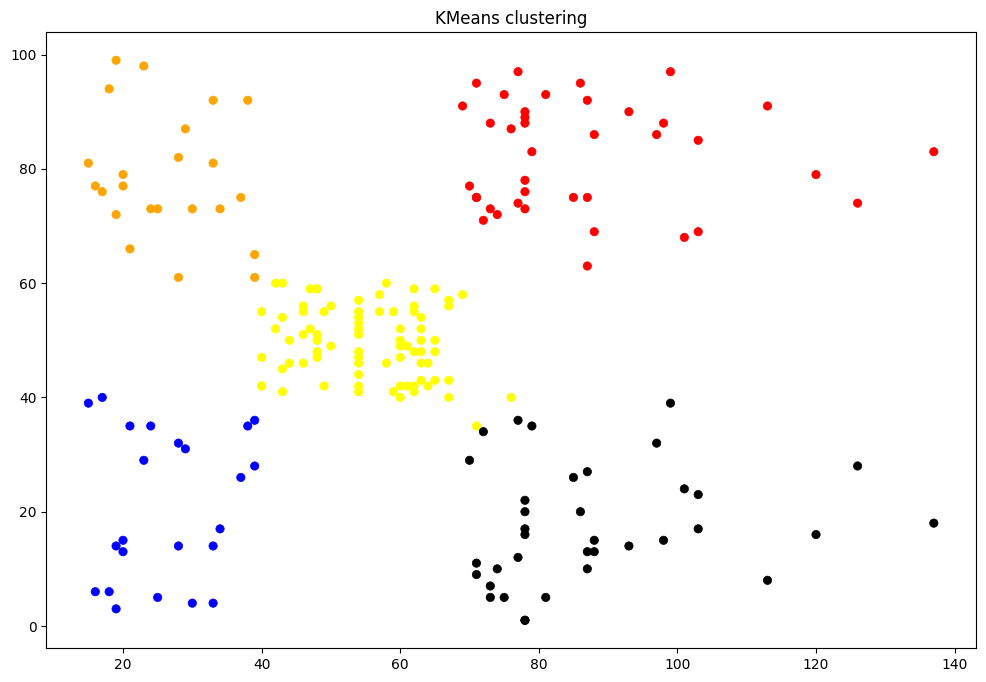

In [ ]:
# Plotting Clusters
colors = {0:"Red",1:"yellow",2:"Blue",3:"Black",4:"Orange"}
plt.figure(figsize=(12,8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],linewidths=0.5, c=df['Labels'].map(colors))
plt.title("KMeans clustering")
plt.show()

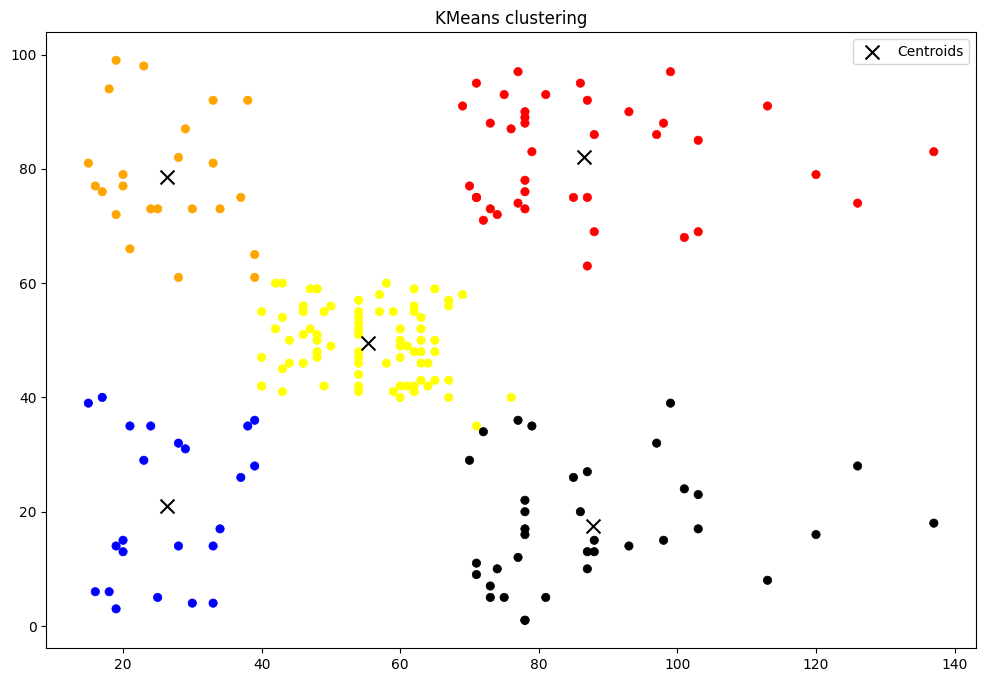

In [ ]:
# Plotting Centroids of the clusters
colors = {0:"Red",1:"yellow",2:"Blue",3:"Black",4:"Orange"}
plt.figure(figsize=(12,8))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],linewidths=0.5, c=df['Labels'].map(colors))
plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3], s = 100, c='black', label='Centroids', marker='x')
plt.title("KMeans clustering")
plt.legend()
plt.show()